### Amazon Book Reviews: Review of the top 50 reviewers: Clustering and feature selection from review text

The original dataset has ~9 million reviews: http://jmcauley.ucsd.edu/data/amazon/.  I have created a subset which contains data of reviewers who have done maximum number of reviews. I did an EDA on the dataset in part I of this notebook. I noticed that some reviewers sound like a corporate name, e.g., Midwest Book Reviews whereas others are individual personnel, e.g., Harriet Klausner. Here we will see if we can differentiate between corporate and individual accounts by reviewing their review texts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('top50reviews.csv')

In [3]:
df.tail(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary
128756,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",0439895294,241,252,2007-09-30 00:00:00 UTC,There are some books that come across my plate...,1622,5,Beautiful doesn't even cover it
128757,A22RY8N8CNDF3A,"Loyd E. Eskildson ""Pragmatist""",0061429252,464,510,2011-09-20 00:00:00 UTC,"Suskind's ""Confidence Men"" is based on 746 hou...",1078,5,Objective Look at Presidential Leadership


#### I made two more tables for book titles and their ranks from the review metadata. Here I am going to merge them with the top 50 reviewer data. 

In [4]:
df1 = pd.read_csv("book_titles_new.csv")
df1.head(1)

,asin,title
0,0001048791,"The Crucible: Performed by Stuart Pankin, Jero..."


In [5]:
df = df.merge(df1, on ='asin')
df.tail(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title
128756,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",0307338312,220,248,2008-02-24 00:00:00 UTC,Deepak Chopra's new book is not quite as contr...,312,3,Is Jesus just an Enlightened Master?,The Third Jesus: The Christ We Cannot Ignore
128757,A14OJS0VWMOSWO,Midwest Book Review,0895949903,248,251,2001-03-12 00:00:00 UTC,The Herbal Medicine-Makers Handbook blends the...,58,5,Far more in-depth than your usual herbal recip...,The Herbal Medicine-Maker's Handbook: A Home M...


In [6]:
df2 = pd.read_csv("books_rank_cleaned.csv")
df2.head(1)

,Unnamed: 0,asin,rank
0,0,0001048791,6334800.0


In [7]:
df2 = df2.drop("Unnamed: 0", axis =1)

In [8]:
df2.head(1)

,asin,rank
0,0001048791,6334800.0


In [9]:
df = df.merge(df2, on ='asin')
df.tail(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title,rank
128756,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",0307338312,220,248,2008-02-24 00:00:00 UTC,Deepak Chopra's new book is not quite as contr...,312,3,Is Jesus just an Enlightened Master?,The Third Jesus: The Christ We Cannot Ignore,461913.0
128757,A14OJS0VWMOSWO,Midwest Book Review,0895949903,248,251,2001-03-12 00:00:00 UTC,The Herbal Medicine-Makers Handbook blends the...,58,5,Far more in-depth than your usual herbal recip...,The Herbal Medicine-Maker's Handbook: A Home M...,8306.0


#### Let's take the reviews with at least 2 votes and then sample a subset of 10000. 

In [10]:
dr = df[df.totalVote > 1]
len(dr)

81639

In [11]:
dr1 = dr.sample(n = 10000)
dr1.head(1)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title,rank
75132,A14OJS0VWMOSWO,Midwest Book Review,0972661808,1,2,2005-07-05 00:00:00 UTC,There is a new and growing sub-genre appearing...,177,5,An engaging story filled with memorable charac...,The Teaching of Little Crow,620984.0


In [12]:
len(dr1)

10000

#### Now let's separate corporate accounts from individuals. I am not sure of a better way of doing it programmatically. I did it manually just by looking at names.

** Corporate accounts** 
A14OJS0VWMOSWO, Midwest Book Review, A2F6N60Z96CAJI, Bookreporter, A320TMDV6KCFU, MNix, 
A13QTZ8CIMHHG4, LAS Reviewer "The Long and the Short Of It Re..., A2TX179XAT5GRP, TeensReadToo "Eat. Drink. Read. Be Merrier."
A21NVBFIEQWDSG, Armchair Interviews, A2VKWLCNZF4ZVB, The RAWSISTAZ Reviewers, A1JKGTL51HHTU1, Under The Covers Book Blog, 
A26J2TRDPZH7RZ, Romancing the Book, A2CR57GAJKNWVV, booksforabuck "BooksForABuck", A3U7ELIED4WP4R, Dark Faerie Tales

** There are 11 corporate reviewers out of 50 **

In [14]:
corporate_list = ["A14OJS0VWMOSWO", "A2F6N60Z96CAJI", "A320TMDV6KCFU", "A13QTZ8CIMHHG4", "A2TX179XAT5GRP",
                 "A21NVBFIEQWDSG", "A2VKWLCNZF4ZVB", "A1JKGTL51HHTU1", "A26J2TRDPZH7RZ", "A2CR57GAJKNWVV", "A3U7ELIED4WP4R"]

In [270]:
dr2 = dr1.replace([corporate_list], 'corporate')

In [271]:
dr2_corporate = dr2[dr2.reviewerID == "corporate"]
len(dr2_corporate)

3060

In [17]:
dr2_individual = dr2[dr2.reviewerID != "corporate"]
len(dr2_individual)

6940

In [18]:
individual_list = dr2_individual.reviewerID

In [19]:
dr3_individual = dr2_individual.replace([individual_list], "individual")
dr3_individual.head(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title,rank
91392,individual,"Loyd E. Eskildson ""Pragmatist""",030795255X,29,79,2012-05-22 00:00:00 UTC,Many books have already been written on our re...,441,3,Old News -,"Predator Nation: Corporate Criminals, Politica...",101969.0
112167,individual,"Donald Mitchell ""Jesus Loves You!""",1891105051,8,8,2007-01-19 00:00:00 UTC,"I come from the school of thaw it, zap it, and...",516,5,Zesty Warmth for Winter and Days When You Need...,Comfort Foods: Rachael Ray 30-Minute Meals,948848.0


In [267]:
dr4_individual = dr3_individual.sample(n = 3060) # Taking 3128 samples because the corporate list also contains the same.
len(dr4_individual)

3060

In [268]:
dr4 = pd.concat([dr2_corporate, dr4_individual]) # The list where reviewerIds are categorzed as corporate and individual

In [269]:
len(dr4)

6120

Now we will create some functions for text analysis. Some of these codes are from http://brandonrose.org/clustering

In [23]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [24]:
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
from sklearn.feature_extraction import text
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA, KernelPCA

In [25]:
add_text = ["book"]
my_stop_words = text.ENGLISH_STOP_WORDS.union(add_text)
stemmer = SnowballStemmer("english")

In [26]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(add_text)

In [27]:
stemmer = SnowballStemmer("english")

Now we will create a vocabulary dictionary from the review summary. Here I am taking summary but also can do that fromreview txt itself. Remember there are two columns for texts and summary. 

In [28]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in dr4.summary:
    allwords_stemmed = tokenize_and_stem(i) 
    totalvocab_stemmed.extend(allwords_stemmed) 

    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
vocab_frame = vocab_frame.drop(add_text)
vocab_frame.head()

,words
an,an
engag,engaging
stori,story
fill,filled
with,with


In [29]:
vocab_frame.shape

(42089, 1)

Now let's use Term frequency inverse document frequency (Tfidf) vectorizer to get features from the summary.

In [272]:
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, max_features=5000,
                                     min_df=0.0, stop_words=set(my_stop_words),
                                     use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,1)) # we will tune the parameters

In [273]:
%time tfidf_matrix = tfidf_vectorizer.fit_transform(dr4.summary) 

Wall time: 2.73 s


In [32]:
terms = tfidf_vectorizer.get_feature_names()
terms[:10]

[u"'d",
 u"'m",
 u"'s",
 u'*not*',
 u"*shouldn't*",
 u'*who*',
 u'-kind',
 u'-the',
 u'..but',
 u'..sort']

In [33]:
tfidf_vocab = tfidf_vectorizer.vocabulary_
tfidf_vocab = pd.DataFrame(tfidf_vocab.items(), columns = ['term', '#'])
tfidf_vocab[:10]

,term,#
0,yellow,4976
1,asian,321
2,brystion,610
3,captain,680
4,authorit,365
5,accur,85
6,sorri,4046
7,swan,4287
8,common-,897
9,swap,4288


In [34]:
tfidf_vocab.shape # since we have taken 5000 max features

(5000, 2)

In [35]:
dense = tfidf_matrix.todense()
dense

matrix([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.22944696, ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

In [36]:
dense = tfidf_matrix.todense()
len(dense[0].tolist()[0])
review_dense = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(review_dense)), review_dense)]
len(phrase_scores)

5000

In [37]:
top_numbers = 100
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
top_words = []
top_score = []
top =[]
for phrase, score in [(terms[word_id], score) 
    for (word_id, score) in sorted_phrase_scores][:top_numbers]:
        #print('{0: <20} {1}'.format(phrase, round(score,5)))
        top.append({'Feature_Name':phrase, 'Score':score})
        top_words.append(phrase)
        top_score.append(int(score*100))

pd.DataFrame(top)[:10]

,Feature_Name,Score
0,affirm,0.439854
1,memor,0.403316
2,metaphys,0.403316
3,spiritu,0.347648
4,insight,0.288978
5,charact,0.276915
6,engag,0.276915
7,life,0.270706
8,stori,0.224027
9,'d,0.000000


#### We can do PCA on the dense matrix to visualize the clusters

In [38]:
%time pca = PCA(n_components=2).fit(dense)
data2D = pca.transform(dense)

Wall time: 3.25 s


In [39]:
dataframe1 = pd.DataFrame(dict(x=data2D[:,0], y=data2D[:,1], reviewer=dr4.reviewerID))
dataframe1.head(3)

,reviewer,x,y
75132,corporate,-0.044464,-0.010906
51106,corporate,-0.034831,-0.015811
105269,corporate,-0.043647,-0.020468


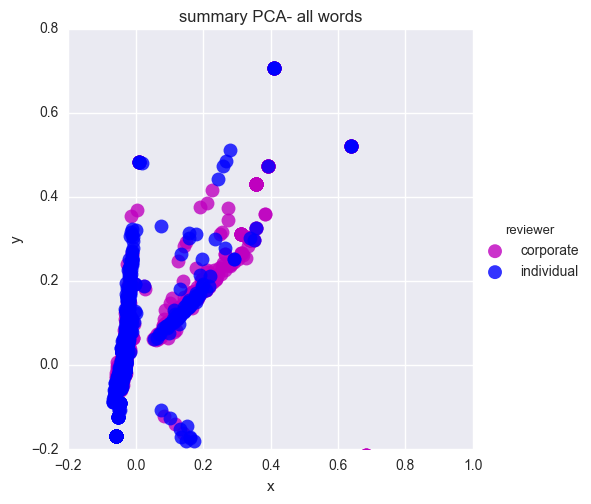

In [43]:
sns.set_style("darkgrid")
import matplotlib as mpl
pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)
#sns.lmplot(x = 'x', y = 'y', hue = "reviewer", data=dataframe1, fit_reg= False, scatter_kws={"s": 50}, 
                #markers=open_circle, palette=dict(corporate="m", individual="b")) #scatter_kws={"s": 50}

sns.lmplot(x = 'x', y = 'y', hue = "reviewer", data=dataframe1, palette=dict(corporate="m", individual="b"),
           fit_reg= False, scatter_kws={"s": 100}) 
               
plt.ylim([-0.2, 0.8])
plt.title ("summary PCA- all words")
plt.show()

#### We can define a function which would take a dataframe and returns top words per clusters

In [284]:
from __future__ import print_function
from sklearn.feature_extraction import text
from sklearn.cluster import KMeans
from sklearn.externals import joblib
import numpy as np

#add_text = np.array (["book", "'s", "read", "good", "tale", "love", "excellent", "great", "any", "recommended", "highly",
                     #"joyfully", "n't", "wonderfully", "wonder", "wonderful", "best", "anything", "anyone", "beautiful",
            #"enthusiastically", "very", "sf", "free", "super", "exciting", "excellent", "terrific", "enjoyed", "fantastic",
            #"important", "story", "recommended", "readers", "novel", "any", "excellent", "excellence", "recommend", 
            #"recommendation", "read", "reader", "readers", "beauty"])
add_text = ["book"]
my_stop_words = text.ENGLISH_STOP_WORDS.union(add_text)
stemmer = SnowballStemmer("english")

def reviewer_cluster_summary (dataframe, num_clusters, n_words):
     
    totalvocab_stemmed = []
    totalvocab_tokenized = []
    
    for i in dataframe.summary:
        allwords_stemmed = tokenize_and_stem(i) 
        totalvocab_stemmed.extend(allwords_stemmed) 

        allwords_tokenized = tokenize_only(i)
        totalvocab_tokenized.extend(allwords_tokenized)

    vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
    vocab_frame = vocab_frame.drop(my_stop_words)
    
    tfidf_vectorizer_cluster = TfidfVectorizer(analyzer=u'word', max_df=0.8, 
        max_features=10000, 
        min_df=30, 
        stop_words=my_stop_words,
                                         use_idf=True, 
        tokenizer=tokenize_and_stem, 
                                               ngram_range=(1,1)) # See the min_df, max_df and ngram_ranges

    tfidf_matrix_cluster = tfidf_vectorizer_cluster.fit_transform(dataframe.summary) 
    
    terms = tfidf_vectorizer_cluster.get_feature_names()
    
    print ("Tfidf Features:")
    print ()
    print (terms)
   
    tfidf_matrix_cluster_dense = tfidf_matrix_cluster.todense()
    
    pca = PCA(n_components=2).fit(tfidf_matrix_cluster_dense)
    data2D = pca.transform(tfidf_matrix_cluster_dense)
    
    dataframe1 = pd.DataFrame(dict(x=data2D[:,0], y=data2D[:,1], asin = dataframe.asin, title=dataframe.title, 
                                   reviewer=dataframe.reviewerID))
    
    km = KMeans(n_clusters=num_clusters, random_state= 123, n_init=20)
   
    
    dataframe1 ['clusterID'] = km.fit_predict(data2D)
    
    centroids = km.cluster_centers_
    sns.lmplot(x = 'x', y = 'y', hue = "reviewer", data=dataframe1, fit_reg= False, scatter_kws={"s": 100},
              palette=dict(corporate="m", individual="b")) 
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = "x", color = 'k', s=80, linewidths=3)
    plt.title ("2D PCA")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
    km.fit(tfidf_matrix_cluster)
    clusters = km.labels_.tolist()

    joblib.dump(km,  'doc_cluster22.pkl')
    km = joblib.load('doc_cluster22.pkl')
    clusters = km.labels_.tolist()
    dataframe['clusterName'] = clusters
    print()
    print ("Number of reviewers in each cluster:")
    print (dataframe.clusterName.value_counts())
    dataframe = dataframe.set_index('clusterName')
    print()
    print("Top terms per cluster:")
    print()

    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

    for i in range(num_clusters):
        print("Cluster %d top words:" % i, end='')

        for ind in order_centroids[i, :n_words]: 
            print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
        print() #add whitespace
        print() #add whitespace
        
        corporate = []
        individual = []
        for reviewer in dataframe.ix[i]['reviewerID'].values.tolist():
            if reviewer == 'corporate':
                corporate.append(reviewer)
            else:
                individual.append(reviewer)
        print ("Numbers of corporate reviewers: ", len (corporate))  
        print ("Numbers of individual reviewers:", len(individual))
        print() #add whitespace
        print()
        print("Cluster %d reviewers:" % i, end='')
        
        for reviewer in dataframe.ix[i]['reviewerName'].unique():
            print(' %s,' % reviewer, end='')
        print() #add whitespace
        print() #add whitespace
    
    print() #add whitespace
    print() #add whitespace

Tfidf Features:

[u"'s", u'action', u'addit', u'adventur', u'age', u'american', u'amus', u'ani', u'anoth', u'anyon', u'author', u'beauti', u'best', u'better', u'busi', u'charact', u'children', u'collect', u'come', u'contemporari', u'courtesi', u'cover', u'dark', u'delight', u'drama', u'end', u'engag', u'enjoy', u'entertain', u'excel', u'excit', u'famili', u'fan', u'fantasi', u'fantast', u'fascin', u'fast-pac', u'fiction', u'fine', u'free', u'fun', u'funni', u'general', u'good', u'great', u'guid', u'high', u'histor', u'histori', u'hot', u'human', u'humor', u'import', u'inform', u'insight', u'inspir', u'intrigu', u'investig', u'joy', u'just', u'librari', u'life', u'like', u'live', u'look', u'love', u'make', u'mani', u'militari', u'miss', u'mysteri', u"n't", u'need', u'new', u'novel', u'outstand', u'pack', u'paranorm', u'perfect', u'person', u'pick', u'plot', u'polic', u'polit', u'power', u'present', u'procedur', u'quot', u'read', u'reader', u'real', u'recip', u'recommend', u'refer', u're

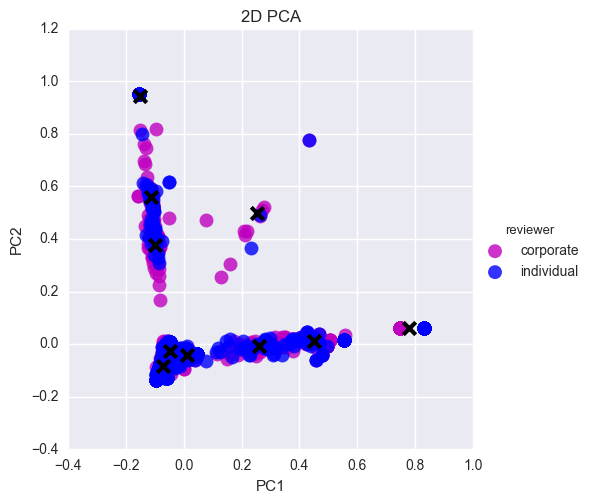


Number of reviewers in each cluster:
9    4210
2     443
1     243
0     223
3     220
5     213
7     179
6     136
4     136
8     117
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: thriller, exciting, suspense, terrific, great, strong, fast-paced, investigative, historical, fiction,

Numbers of corporate reviewers:  31
Numbers of individual reviewers: 192


Cluster 0 reviewers: Bookreporter, Midwest Book Review, Armchair Interviews, Dark Faerie Tales, Harriet Klausner, Donald Mitchell "Jesus Loves You!", E. Bukowsky "booklover10", Gail Cooke, Loyd E. Eskildson "Pragmatist", A. Ross, Jerry Saperstein, Nash Black "Troubadour",

Cluster 1 top words: 's, life, world, guide, any, best, history, novel, children, read,

Numbers of corporate reviewers:  161
Numbers of individual reviewers: 82


Cluster 1 reviewers: Midwest Book Review, Bookreporter, The RAWSISTAZ Reviewers, MNix, Armchair Interviews, Under The Covers Book Blog, booksforabuck "BooksForABuck", 

In [285]:
reviewer_cluster_summary(dr4, 10, 10)

I am going to discuss a couple of points about the above analysis. 

<p> 1. I played with max_df and min_df in the above function and looked at the terms (as shown below). max_df is a cut off point after which it ignore terms that have a higher document frequency. I set it for 0.8 meaning that if some terms occur 80% of the time in a corpus I am going to discard it. min_df is the terms that should be in certain number of documents before it's going to be added in the vocabulary. I set min_df=30, meaning that out of 6000 documents I am analyzing, the terms should be in at least 30 of them (0.05%). 

2. n_gram range is taken as (1, 1). so the term "science fiction" will be represented as "science" and "fiction" - these two different terms in the bag of words. I have also played with (1, 2) and (1,3) n_gram ranges. (1, 2) would have taken "science", "fiction" and "science fiction" these three terms. 

3. The PCA plot shows the clusters and cluster centers. I have taken 10 clusters and 10 words closest to the cluster centers. The number of clusters were chosen just by looking at the PCA plot so that we can have words from each segments. 

4. In the Tfidf features, there are terms like 'action'or 'adventur' which are representative of genre of the book and also adjectives like 'enjoy' and 'entertainment'. 

5. One cluster is particularly dense with about 4210 features. We are going to further divide this cluster but before that let's look at other clusters.

<p> Cluster 0 top words: thriller, exciting, suspense, terrific, great, strong, fast-paced, investigative, historical, fiction,

Numbers of corporate reviewers:  31
<p> Numbers of individual reviewers: 192

along with adjectives like exciting, terrific and great this cluster also have terms like "thriller", "suspense", "investigative" and "historical". This cluster contains more individual reviewers. The words in cluster 7:

Cluster 7 top words: romance, historical, regency, entertaining, contemporary, amusements, terrific, paranormal, engaging, great,

Numbers of corporate reviewers:  25
<p> Numbers of individual reviewers: 154

On the contrary, see cluster # 3

Cluster 3 top words: recommended, highly, joyfully, title, read, any, collection, pick, very, addition,

Numbers of corporate reviewers:  204
<p>Numbers of individual reviewers: 16

The top terms are recommended or highly but there is no genre words like romance, thriller or suspense - and # of corporate reviewers are way more. Remember we have taken 3000 each reviews from both corporate and individual reviewers. 

Here is how I found min_df


In [286]:
#add_text = np.array (["book", "'s", "read", "good", "tale", "love", "excellent", "great", "any", "recommended", "highly",
                     #"joyfully", "n't", "wonderfully", "wonder", "wonderful", "best", "anything", "anyone", "beautiful",
            #"enthusiastically", "very", "sf", "free", "super", "exciting", "excellent", "terrific", "enjoyed", "fantastic",
            #"important", "story", "recommended", "readers", "novel", "any", "excellent", "excellence", "recommend", 
            #"recommendation", "read", "reader", "readers", "beauty"])
add_text = ["book"]
my_stop_words = text.ENGLISH_STOP_WORDS.union(add_text)
stemmer = SnowballStemmer("english")

def print_terms (dataframe):
     
    totalvocab_stemmed = []
    totalvocab_tokenized = []
    
    for i in dataframe.summary:
        allwords_stemmed = tokenize_and_stem(i) 
        totalvocab_stemmed.extend(allwords_stemmed) 

        allwords_tokenized = tokenize_only(i)
        totalvocab_tokenized.extend(allwords_tokenized)

    vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
    vocab_frame = vocab_frame.drop(my_stop_words)
    
    min_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    
    for i in min_df:
        tfidf_vectorizer_cluster = TfidfVectorizer(analyzer=u'word', max_df=0.8, 
            max_features=10000, 
            min_df=i, 
            stop_words=my_stop_words,
                                             use_idf=True, 
            tokenizer=tokenize_and_stem, 
                                                   ngram_range=(1,1))

        tfidf_matrix_cluster = tfidf_vectorizer_cluster.fit_transform(dataframe.summary) 

        terms = tfidf_vectorizer_cluster.get_feature_names()
        print("min_df %d top terms:" % i, end='')
        print ()
        print (terms)
        print ()

In [287]:
print_terms(dr4)

min_df 10 top terms:
[u"'s", u'absolut', u'absorb', u'account', u'achiev', u'action', u'action-pack', u'addit', u'adult', u'adventur', u'advic', u'age', u'altern', u'alway', u'amateur', u'amaz', u'america', u'american', u'amp', u'amus', u'analysi', u'ani', u'anoth', u'antholog', u'anyon', u'appeal', u'applic', u'approach', u'art', u'artist', u'audienc', u'author', u'bad', u'base', u'basic', u'battl', u'beach', u'beauti', u'begin', u'believ', u'best', u'better', u'big', u'biograph', u'biographi', u'bit', u'blend', u'bodi', u'brilliant', u'build', u'busi', u'ca', u'captiv', u'care', u'celebr', u'centuri', u'certain', u'challeng', u'chanc', u'chang', u'charact', u'charm', u'chick', u'child', u'children', u'choic', u'christian', u'christma', u'civil', u'classic', u'clear', u'collect', u'college-level', u'color', u'combin', u'come', u'compel', u'complet', u'complex', u'comprehens', u'concept', u'connect', u'consid', u'contemporari', u'continu', u'contribut', u'cook', u'cookbook', u'courtesi

In [350]:
#add_text = np.array (["book", "'s", "read", "good", "tale", "love", "excellent", "great", "any", "recommended", "highly",
                    # "joyfully", "n't", "wonderfully", "wonder", "wonderful", "best", "anything", "anyone", "beautiful",
            #"enthusiastically", "very", "sf", "free", "super", "exciting", "excellent", "terrific", "enjoyed", "fantastic",
            #"important", "story", "recommended", "readers", "novel", "any", "excellent", "excellence", "recommend", 
            #"recommendation", "read", "reader", "readers", "beauty"])
add_text = ["book"]
my_stop_words = text.ENGLISH_STOP_WORDS.union(add_text)
stemmer = SnowballStemmer("english")

def print_terms_maxdf (dataframe):
     
    totalvocab_stemmed = []
    totalvocab_tokenized = []
    
    for i in dataframe.summary:
        allwords_stemmed = tokenize_and_stem(i) 
        totalvocab_stemmed.extend(allwords_stemmed) 

        allwords_tokenized = tokenize_only(i)
        totalvocab_tokenized.extend(allwords_tokenized)

    vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
    vocab_frame = vocab_frame.drop(my_stop_words)
    
    max_df = [0.1, 0.50, 1.00]
    
    for i in max_df:
        tfidf_vectorizer_cluster = TfidfVectorizer(analyzer=u'word', max_df=i, 
            max_features=10000, 
            min_df=20, 
            stop_words=my_stop_words,
                                             use_idf=True, 
            tokenizer=tokenize_and_stem, 
                                                   ngram_range=(1,1))

        tfidf_matrix_cluster = tfidf_vectorizer_cluster.fit_transform(dataframe.summary) 

        terms = tfidf_vectorizer_cluster.get_feature_names()
        print("max_df %d top terms:" % float(i), end='')
        print ()
        print (terms)
        print ()

In [351]:
print_terms_maxdf(dr4)

max_df 0 top terms:
[u"'s", u'absolut', u'account', u'action', u'addit', u'adult', u'adventur', u'advic', u'age', u'amateur', u'america', u'american', u'amp', u'amus', u'ani', u'anoth', u'anyon', u'art', u'author', u'basic', u'beauti', u'best', u'better', u'blend', u'brilliant', u'busi', u'ca', u'centuri', u'chang', u'charact', u'charm', u'children', u'choic', u'classic', u'collect', u'color', u'come', u'compel', u'complex', u'contemporari', u'courtesi', u'cover', u'cultur', u'dark', u'day', u'dead', u'debut', u'deep', u'definit', u'delight', u'design', u'develop', u'did', u'differ', u'doe', u'drama', u'easi', u'effect', u'emot', u'end', u'engag', u'enjoy', u'entertain', u'erot', u'especi', u'everi', u'excel', u'excit', u'exhilar', u'experi', u'fabul', u'famili', u'fan', u'fantasi', u'fantast', u'fascin', u'fast-pac', u'fiction', u'fine', u'free', u'friend', u'fun', u'funni', u'futur', u'general', u'good', u'great', u'guid', u'hard', u'heart', u'help', u'high', u'histor', u'histori', u

### Cluster # 9 has 4210 elements. We can further split this cluster

In [290]:
len(dr4[dr4.clusterName == 9])

4210

In [291]:
dr5 = dr4[dr4.clusterName == 9]

Tfidf Features:

[u'action', u'age', u'american', u'ani', u'anoth', u'beauti', u'best', u'better', u'busi', u'charact', u'collect', u'come', u'dark', u'delight', u'drama', u'engag', u'enjoy', u'entertain', u'excel', u'excit', u'famili', u'fan', u'fascin', u'fiction', u'fine', u'free', u'fun', u'good', u'great', u'guid', u'histor', u'histori', u'human', u'inform', u'insight', u'intrigu', u'librari', u'life', u'like', u'live', u'look', u'make', u'mysteri', u"n't", u'need', u'new', u'novel', u'perfect', u'person', u'pick', u'polic', u'power', u'procedur', u'quot', u'read', u'reader', u'recip', u'romant', u'scienc', u'seri', u'sf', u'strong', u'studi', u'survey', u'suspens', u'tale', u'terrif', u'thought', u'time', u'use', u'veri', u'want', u'war', u'way', u'wonder', u'world', u'written']


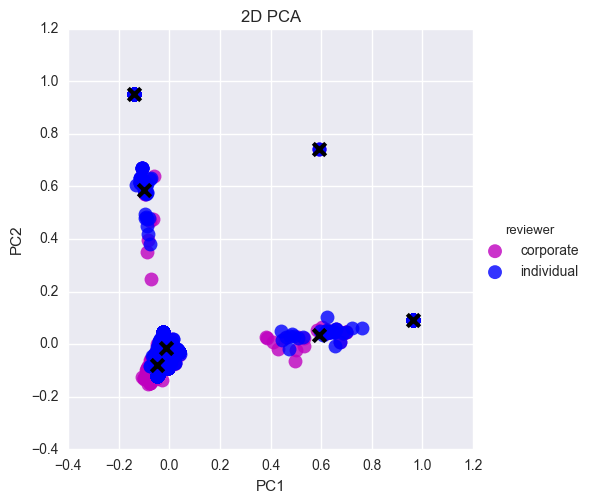


Number of reviewers in each cluster:
0    3663
1     120
2     109
5     105
6      98
3      59
4      56
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: novel, any, excellent, great, history, collection, life, n't, guide, new,

Numbers of corporate reviewers:  1782
Numbers of individual reviewers: 1881


Cluster 0 reviewers: Armchair Interviews, Midwest Book Review, LAS Reviewer "The Long and the Short Of It Re..., MNix, Bookreporter, Under The Covers Book Blog, The RAWSISTAZ Reviewers, Romancing the Book, Dark Faerie Tales, booksforabuck "BooksForABuck", TeensReadToo "Eat. Drink. Read. Be Merrier.", nan, Yolanda S. Bean, Thomas Duff "Duffbert", Harriet Klausner, E. R. Bird "Ramseelbird", Steven H. Propp, S. Schwartz "romonko", Nash Black "Troubadour", D. Blankenship, Shalom Freedman "Shalom Freedman", Rebecca of Amazon "The Rebecca Review", Loyd E. Eskildson "Pragmatist", Charles Ashbacher, Robert Beveridge "xterminal", Donald Mitchell "Jesus Loves You

C:\Users\Bis\Anaconda2\lib\site-packages\ipykernel\__main__.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [293]:
reviewer_cluster_summary(dr5, 7, 10)

Subclustering did not find any more insight but even when it talks more about genre words individual reviewers are more again. Cluster 6 top words: mystery, historical, good, excellent, terrific, fans, fine, enjoyed, entertaining, romantic,

Numbers of corporate reviewers:  36
Numbers of individual reviewers: 62

One can imagine of writing the same function to analyze the review text. 

In [321]:
from __future__ import print_function

add_text = [ "'s", "book", "n't", "klausner" ] 

def reviewer_cluster_text (dataframe, num_clusters, n_words):
    
    from sklearn.cluster import KMeans
    from sklearn.externals import joblib
    
    
    totalvocab_stemmed = []
    totalvocab_tokenized = []
    for i in dataframe.reviewText:
        allwords_stemmed = tokenize_and_stem(i) 
        totalvocab_stemmed.extend(allwords_stemmed) 

        allwords_tokenized = tokenize_only(i)
        totalvocab_tokenized.extend(allwords_tokenized)

    vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
    
    tfidf_vectorizer_cluster = TfidfVectorizer(max_df=0.6, max_features=10000,
                                         min_df=80, 
                                            stop_words=set(my_stop_words),
                                         use_idf=True, 
                                tokenizer=tokenize_and_stem, ngram_range=(1, 1))

    tfidf_matrix_cluster = tfidf_vectorizer_cluster.fit_transform(dataframe.reviewText) 
    
    terms = tfidf_vectorizer_cluster.get_feature_names()
    
    print ("Tfidf Features:")
    print ()
    print (terms)
   
    tfidf_matrix_cluster_dense = tfidf_matrix_cluster.todense()
    
    pca = PCA(n_components=2).fit(tfidf_matrix_cluster_dense)
    data2D = pca.transform(tfidf_matrix_cluster_dense)
    
    dataframe1 = pd.DataFrame(dict(x=data2D[:,0], y=data2D[:,1], asin = dataframe.asin, title=dataframe.title, 
                                   reviewer=dataframe.reviewerID))
    
    km = KMeans(n_clusters=num_clusters, random_state= 123, n_init=20)
   
    
    dataframe1 ['clusterID'] = km.fit_predict(data2D)
    
    centroids = km.cluster_centers_
    sns.lmplot(x = 'x', y = 'y', hue = "reviewer", data=dataframe1, fit_reg= False, scatter_kws={"s": 100},
              palette=dict(corporate="m", individual="b")) 
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = "x", color = 'k', s=80, linewidths=2)
    plt.title ("2D PCA")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
    km.fit(tfidf_matrix_cluster)
    clusters = km.labels_.tolist()

    joblib.dump(km,  'doc_cluster.pkl')
    km = joblib.load('doc_cluster.pkl')
    clusters = km.labels_.tolist()
    dataframe['clusterName'] = clusters
    print()
    print ("Number of reviewers in each cluster:")
    print (dataframe.clusterName.value_counts())
    dataframe = dataframe.set_index('clusterName')
    print()
    print("Top terms per cluster:")
    print()

    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

    for i in range(num_clusters):
        print("Cluster %d top words:" % i, end='')

        for ind in order_centroids[i, :n_words]: 
            print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
        print() #add whitespace
        print() #add whitespace
        
        corporate = []
        individual = []
        for reviewer in dataframe.ix[i]['reviewerID'].values.tolist():
            if reviewer == 'corporate':
                corporate.append(reviewer)
            else:
                individual.append(reviewer)
        print ("Numbers of corporate reviewers: ", len (corporate))  
        print ("Numbers of individual reviewers:", len(individual))
        print() #add whitespace
        print()
        print("Cluster %d reviewers:" % i, end='')
        
        for reviewer in dataframe.ix[i]['reviewerName'].unique():
            print(' %s,' % reviewer, end='')
        print() #add whitespace
        print() #add whitespace
    
    print() #add whitespace
    print() #add whitespace


In [310]:
dr6 = dr4.sample(n = 1000) # a smaller sample size for analyzing texts

Tfidf Features:

[u'accept', u'action', u'actual', u'alway', u'american', u'ani', u'anoth', u'anyon', u'anyth', u'appear', u'ask', u'attract', u'author', u'away', u'bad', u'beauti', u'becaus', u'becom', u'befor', u'begin', u'believ', u'best', u'better', u'bit', u'bring', u'busi', u'ca', u'care', u'case', u'certain', u'chang', u'chapter', u'charact', u'children', u'citi', u'clear', u'collect', u'come', u'complet', u'continu', u'cours', u'cover', u'creat', u'danger', u'daughter', u'day', u'dead', u'deal', u'death', u'decid', u'develop', u'did', u'die', u'differ', u'discov', u'doe', u'dure', u'emot', u'end', u'engag', u'enjoy', u'entertain', u'especi', u'event', u'everi', u'everyon', u'everyth', u'expect', u'experi', u'fact', u'fall', u'famili', u'fan', u'far', u'father', u'feel', u'fiction', u'final', u'follow', u'forc', u'friend', u'fun', u'futur', u'girl', u'goe', u'good', u'great', u'grow', u'hand', u'happen', u'hard', u'head', u'heart', u'help', u'high', u'histor', u'histori', u'home

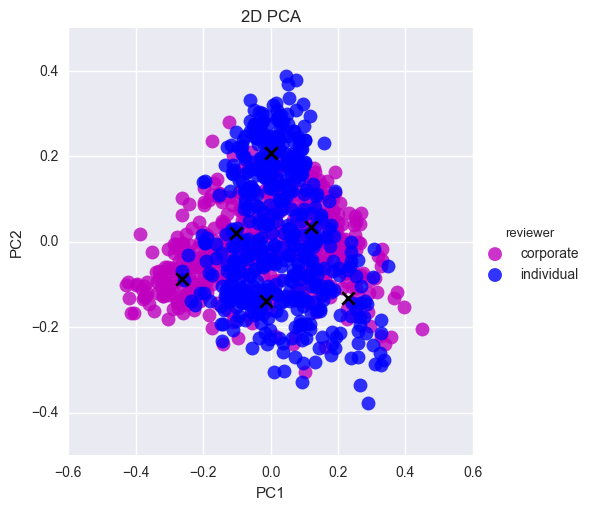


Number of reviewers in each cluster:
3    244
5    207
2    202
0    183
4    112
1     52
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: klausner, murder, tales, lead, fans, investigates, years, love, killing, however,

Numbers of corporate reviewers:  29
Numbers of individual reviewers: 154


Cluster 0 reviewers: Harriet Klausner, MNix, Luan Gaines "luansos", Bookreporter, Gail Cooke, Jane, Midwest Book Review, Armchair Interviews, Blue Tyson "- Research Finished", Arthur W. Jordin, E. Bukowsky "booklover10", cb, The RAWSISTAZ Reviewers,

Cluster 1 top words: war, world, american, history, eventful, novel, historic, force, time, states,

Numbers of corporate reviewers:  27
Numbers of individual reviewers: 25


Cluster 1 reviewers: Harriet Klausner, Blue Tyson "- Research Finished", Shalom Freedman "Shalom Freedman", Bookreporter, LAS Reviewer "The Long and the Short Of It Re..., Neal C. Reynolds, A. Ross, Jerry Saperstein, Armchair Interviews, Loyd E. 

In [322]:
reviewer_cluster_text(dr6, 6, 10)

### What if we supply book genre?

In [328]:
vocab = ["romance", "mystery", "drama", "fiction", "teen", "teens", "biography", "story", "tale", "animal", "family", "fun", 
         "horror", "comedy", "action", "classic", "crime", "fantasy", "humor", "children", "kid", "families","conceptual",
        "innovation", "traumas", "style", "fashion", "social", "issues", "collection", "science", "period", "photographs",
        "historical", "murder", "suspenseful", "suspence", "inspirational", "graphic", "instructions", "thriller", "adventure",
        "western", "textbook", "legal", "action-packed", "career", "information", "contemporary",
        "mature", "adult", "military", "marine", "cops", "agriculture", "history", "photography","academic", "academy",
        "geography", "myth", "mythology", "paranormal", "essay", "self-help", "memoir", "autobiography", 
         "romantic", "fairy tale", "science fiction", "religion", "jesus"]
from __future__ import print_function

def reviewer_cluster_summary_genre (dataframe, num_clusters, n_words):
    
    from sklearn.cluster import KMeans
    from sklearn.externals import joblib
    
    
    totalvocab_stemmed = []
    totalvocab_tokenized = []
    for i in dataframe.summary:
        allwords_stemmed = tokenize_and_stem(i) 
        totalvocab_stemmed.extend(allwords_stemmed) 

        allwords_tokenized = tokenize_only(i)
        totalvocab_tokenized.extend(allwords_tokenized)

    vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
    
    tfidf_vectorizer_cluster = TfidfVectorizer(#max_df=1.0, max_features=10000,
                                         #min_df=0.0, 
                                            stop_words=set(my_stop_words),
                                         use_idf=True, 
                                tokenizer=tokenize_and_stem, ngram_range=(1, 1), vocabulary = vocab)

    tfidf_matrix_cluster = tfidf_vectorizer_cluster.fit_transform(dataframe.summary) 
    
    terms = tfidf_vectorizer_cluster.get_feature_names()

   
    tfidf_matrix_cluster_dense = tfidf_matrix_cluster.todense()
    
    pca = PCA(n_components=2).fit(tfidf_matrix_cluster_dense)
    data2D = pca.transform(tfidf_matrix_cluster_dense)
    
    dataframe1 = pd.DataFrame(dict(x=data2D[:,0], y=data2D[:,1], asin = dataframe.asin, title=dataframe.title, 
                                   reviewer=dataframe.reviewerID))
    
    km = KMeans(n_clusters=num_clusters, random_state= 123, n_init=20)
   
    
    dataframe1 ['clusterID'] = km.fit_predict(data2D)
    
    centroids = km.cluster_centers_
    sns.lmplot(x = 'x', y = 'y', hue = "reviewer", data=dataframe1, fit_reg= False, scatter_kws={"s": 100},
              palette=dict(corporate="m", individual="b")) 
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = "x", color = 'k', s=80, linewidths=3)
    plt.title ("2D PCA")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
    km.fit(tfidf_matrix_cluster)
    clusters = km.labels_.tolist()

    joblib.dump(km,  'doc_cluster.pkl')
    km = joblib.load('doc_cluster.pkl')
    clusters = km.labels_.tolist()
    dataframe['clusterName'] = clusters
    print()
    print ("Number of reviewers in each cluster:")
    print (dataframe.clusterName.value_counts())
    dataframe = dataframe.set_index('clusterName')
    print()
    print("Top terms per cluster:")
    print()

    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

    for i in range(num_clusters):
        print("Cluster %d top words:" % i, end='')

        for ind in order_centroids[i, :n_words]: 
            print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
        print() #add whitespace
        print() #add whitespace
        
        corporate = []
        individual = []
        for reviewer in dataframe.ix[i]['reviewerID'].values.tolist():
            if reviewer == 'corporate':
                corporate.append(reviewer)
            else:
                individual.append(reviewer)
        print ("Numbers of corporate reviewers: ", len (corporate))  
        print ("Numbers of individual reviewers:", len(individual))
        print() #add whitespace
        print()
        print("Cluster %d reviewers:" % i, end='')
        
        for reviewer in dataframe.ix[i]['reviewerName'].unique():
            print(' %s,' % reviewer, end='')
        print() #add whitespace
        print() #add whitespace
    
    print() #add whitespace
    print() #add whitespace


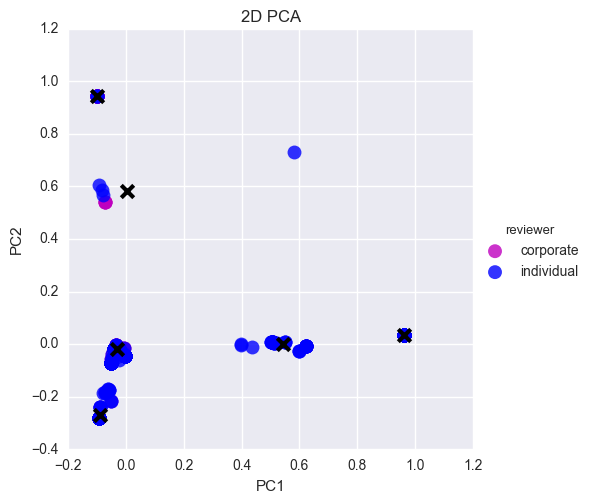


Number of reviewers in each cluster:
0    5435
3     213
1     142
2     129
5     111
4      90
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: drama, action, humor,

Numbers of corporate reviewers:  2764
Numbers of individual reviewers: 2671


Cluster 0 reviewers: Midwest Book Review, Armchair Interviews, LAS Reviewer "The Long and the Short Of It Re..., Bookreporter, MNix, Under The Covers Book Blog, The RAWSISTAZ Reviewers, Romancing the Book, Dark Faerie Tales, booksforabuck "BooksForABuck", nan, TeensReadToo "Eat. Drink. Read. Be Merrier.", Yolanda S. Bean, Thomas Duff "Duffbert", Neal C. Reynolds, Harriet Klausner, E. R. Bird "Ramseelbird", Steven H. Propp, S. Schwartz "romonko", Blue Tyson "- Research Finished", Nash Black "Troubadour", D. Blankenship, Shalom Freedman "Shalom Freedman", Rebecca of Amazon "The Rebecca Review", Loyd E. Eskildson "Pragmatist", Charles Ashbacher, Robert Beveridge "xterminal", Donald Mitchell "Jesus Loves You!", A. Ros

In [331]:
reviewer_cluster_summary_genre(dr4, 6, 3)

### Feature extraction from review texts when genre is given

In [343]:
def reviewer_cluster_text_genre (dataframe, num_clusters, n_words):
    
    from sklearn.cluster import KMeans
    from sklearn.externals import joblib
    
    
    totalvocab_stemmed = []
    totalvocab_tokenized = []
    for i in dataframe.reviewText:
        allwords_stemmed = tokenize_and_stem(i) 
        totalvocab_stemmed.extend(allwords_stemmed) 

        allwords_tokenized = tokenize_only(i)
        totalvocab_tokenized.extend(allwords_tokenized)

    vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
    
    tfidf_vectorizer_cluster = TfidfVectorizer(#max_df=1.0, max_features=10000,
                                         #min_df=0.0, 
                                            stop_words=set(my_stop_words),
                                         use_idf=True, 
                                tokenizer=tokenize_and_stem, ngram_range=(1, 1), vocabulary = vocab)

    tfidf_matrix_cluster = tfidf_vectorizer_cluster.fit_transform(dataframe.reviewText) 
    
    terms = tfidf_vectorizer_cluster.get_feature_names()

   
    tfidf_matrix_cluster_dense = tfidf_matrix_cluster.todense()
    
    pca = PCA(n_components=2).fit(tfidf_matrix_cluster_dense)
    data2D = pca.transform(tfidf_matrix_cluster_dense)
    
    dataframe1 = pd.DataFrame(dict(x=data2D[:,0], y=data2D[:,1], asin = dataframe.asin, title=dataframe.title, 
                                   reviewer=dataframe.reviewerID))
    
    km = KMeans(n_clusters=num_clusters, random_state= 123, n_init=20)
   
    
    dataframe1 ['clusterID'] = km.fit_predict(data2D)
    
    centroids = km.cluster_centers_
    sns.lmplot(x = 'x', y = 'y', hue = "reviewer", data=dataframe1, fit_reg= False, scatter_kws={"s": 100},
              palette=dict(corporate="m", individual="b")) 
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = "x", color = 'k', s=80, linewidths=3)
    plt.title ("2D PCA")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
    km.fit(tfidf_matrix_cluster)
    clusters = km.labels_.tolist()

    joblib.dump(km,  'doc_cluster.pkl')
    km = joblib.load('doc_cluster.pkl')
    clusters = km.labels_.tolist()
    dataframe['clusterName'] = clusters
    print()
    print ("Number of reviewers in each cluster:")
    print (dataframe.clusterName.value_counts())
    dataframe = dataframe.set_index('clusterName')
    print()
    print("Top terms per cluster:")
    print()

    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

    for i in range(num_clusters):
        print("Cluster %d top words:" % i, end='')

        for ind in order_centroids[i, :n_words]: 
            print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
        print() #add whitespace
        print() #add whitespace
        
        corporate = []
        individual = []
        for reviewer in dataframe.ix[i]['reviewerID'].values.tolist():
            if reviewer == 'corporate':
                corporate.append(reviewer)
            else:
                individual.append(reviewer)
        print ("Numbers of corporate reviewers: ", len (corporate))  
        print ("Numbers of individual reviewers:", len(individual))
        print() #add whitespace
        print()
        print("Cluster %d reviewers:" % i, end='')
        
        for reviewer in dataframe.ix[i]['reviewerName'].unique():
            print(' %s,' % reviewer, end='')
        print() #add whitespace
        print() #add whitespace
    
    print() #add whitespace
    print() #add whitespace


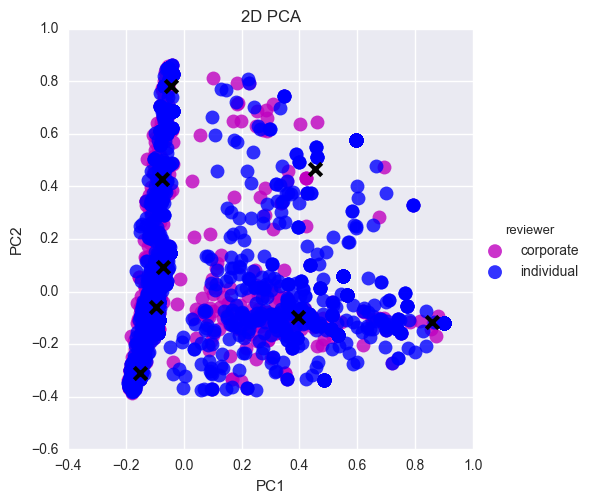


Number of reviewers in each cluster:
1    3397
0     489
2     482
6     436
5     420
3     316
4     312
7     268
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: murder, thriller, crime, tale, fiction,

Numbers of corporate reviewers:  231
Numbers of individual reviewers: 258


Cluster 0 reviewers: Bookreporter, Armchair Interviews, Midwest Book Review, TeensReadToo "Eat. Drink. Read. Be Merrier.", The RAWSISTAZ Reviewers, MNix, LAS Reviewer "The Long and the Short Of It Re..., booksforabuck "BooksForABuck", Dark Faerie Tales, Under The Covers Book Blog, Jerry Saperstein, Harriet Klausner, Michael K. Smith, E. Bukowsky "booklover10", E. A Solinas "ea_solinas", S. Schwartz "romonko", cb, Grady Harp, Loyd E. Eskildson "Pragmatist", Sandy Milan, Arthur W. Jordin, John Matlock "Gunny", Luan Gaines "luansos", Robert Beveridge "xterminal", Donald Mitchell "Jesus Loves You!", Shalom Freedman "Shalom Freedman", Gail Cooke, Charles Ashbacher, D. Blankenship, Lo

In [345]:
reviewer_cluster_text_genre(dr4, 8, 5)

In [346]:
len(dr4[dr4.clusterName == 1])

3397

In [347]:
dr7 = dr4[dr4.clusterName == 1]

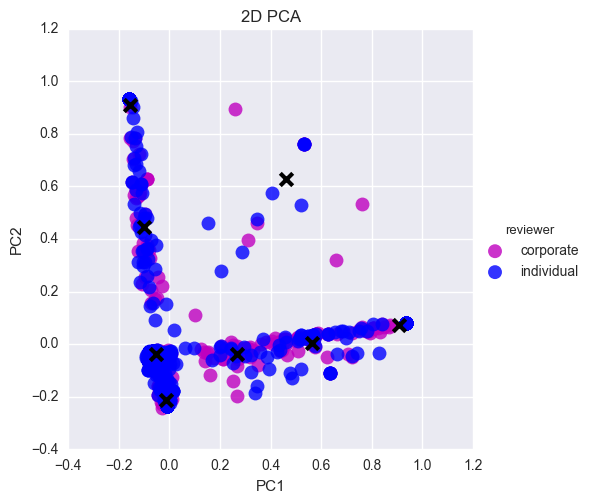

C:\Users\Bis\Anaconda2\lib\site-packages\ipykernel\__main__.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Number of reviewers in each cluster:
0    2571
1     181
3     142
2     137
4     117
5     101
6      97
7      51
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: crime, period, teens, adult, drama,

Numbers of corporate reviewers:  1489
Numbers of individual reviewers: 1082


Cluster 0 reviewers: Midwest Book Review, LAS Reviewer "The Long and the Short Of It Re..., MNix, Under The Covers Book Blog, Armchair Interviews, Bookreporter, The RAWSISTAZ Reviewers, Romancing the Book, Dark Faerie Tales, TeensReadToo "Eat. Drink. Read. Be Merrier.", booksforabuck "BooksForABuck", nan, Yolanda S. Bean, Steven H. Propp, S. Schwartz "romonko", Blue Tyson "- Research Finished", Nash Black "Troubadour", Charles Ashbacher, Robert Beveridge "xterminal", A. Ross, Loyd E. Eskildson "Pragmatist", John Matlock "Gunny", Rolf Dobelli "getAbstract", Michael K. Smith, Grady Harp, Harriet Klausner, Thomas Duff "Duffbert", M. Heiss, Rebecca of Amazon "The Rebecca Review", D. B

In [348]:
reviewer_cluster_text_genre(dr7, 8, 5)